In [36]:
import warnings
warnings.filterwarnings('default', category = FutureWarning)

In [37]:
import numpy as np
import cv2

import PIL.Image as Image
import os

from matplotlib import pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

In [38]:
#Modul Transfer Learningnya

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = IMAGE_SHAPE + (3,))
])

In [39]:
data_dir = pathlib.Path('D:/Pemrograman/NEW ME!!/Python/Iseng/Monster Hunter Classification/images')

monster_image_dir = {
    'alatreon' : list(data_dir.glob('alatreon/*')),
    'rathalos' : list(data_dir.glob('rathalos/*')),
    'rathian' : list(data_dir.glob('rathian/*')),
    'teostra' : list(data_dir.glob('teostra/*')),
    'velkhana' : list(data_dir.glob('velkhana/*')),
}

monster_label_dir = {
    'alatreon' : 0,
    'rathalos' : 1,
    'rathian' : 2,
    'teostra' : 3,
    'velkhana' : 4,
}

In [40]:
x = []
y = []

for monster_name, foto_set in monster_image_dir.items():
    for foto in foto_set:
        iniFoto = cv2.imread(str(foto))
        fotoResize = cv2.resize(iniFoto, (IMAGE_SHAPE))
        x.append(fotoResize)
        y.append(monster_label_dir[monster_name])

In [41]:
x = np.array(x)
y = np.array(y)

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [43]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

## **TRANSFER LEARNING**

In [44]:
extracted_fitur = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(
    extracted_fitur, input_shape = IMAGE_SHAPE + (3, ), trainable = False
)

In [45]:
num_monster = 5

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_monster, activation = 'softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [46]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs = 10)

Epoch 1/10
2/2 [==============================] - 4s 80ms/step - loss: 1.8184 - accuracy: 0.3000
Epoch 2/10
2/2 [==============================] - 0s 74ms/step - loss: 1.4416 - accuracy: 0.4250
Epoch 3/10
2/2 [==============================] - 0s 69ms/step - loss: 1.2586 - accuracy: 0.4750
Epoch 4/10
2/2 [==============================] - 0s 67ms/step - loss: 1.0500 - accuracy: 0.6500
Epoch 5/10
2/2 [==============================] - 0s 72ms/step - loss: 0.8323 - accuracy: 0.8250
Epoch 6/10
2/2 [==============================] - 0s 71ms/step - loss: 0.6926 - accuracy: 0.8500
Epoch 7/10
2/2 [==============================] - 0s 69ms/step - loss: 0.5802 - accuracy: 0.9000
Epoch 8/10
2/2 [==============================] - 0s 70ms/step - loss: 0.4854 - accuracy: 0.9500
Epoch 9/10
2/2 [==============================] - 0s 71ms/step - loss: 0.4094 - accuracy: 0.9500
Epoch 10/10
2/2 [==============================] - 0s 80ms/step - loss: 0.3386 - accuracy: 0.9750


In [47]:
model.evaluate(x_test_scaled, y_test)

1/1 [==============================] - 1s 698ms/step - loss: 1.4273 - accuracy: 0.4545


[1.427272915840149, 0.4545454680919647]

In [48]:
prediksi_monster = model.predict(x_test_scaled)
prediksi_monster = np.argmax(prediksi_monster, axis = 1)
prediksi_monster

1/1 [==============================] - 1s 824ms/step


array([3, 1, 4, 2, 2, 4, 4, 2, 2, 2, 3], dtype=int64)

In [92]:
indeks = 10

key_list = list(monster_label_dir.keys())
val_list = list(monster_label_dir.values())

print('Gambar Sebenarnya:', key_list[y_test[indeks]])

Gambar Sebenarnya: teostra


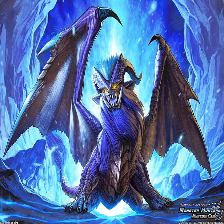

In [93]:
Image.fromarray(x_test[indeks])

In [94]:
key_list = list(monster_label_dir.keys())
val_list = list(monster_label_dir.values())

print('Prediksi:', key_list[prediksi_monster[indeks]])

Prediksi: teostra
